# Analysis of S-layers crystallization kinetics monitored with tr-SAXS

In [377]:
# Useful libraries
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from numpy import genfromtxt
from sklearn.decomposition import FastICA, PCA

In [378]:
# Data loading
filename='./data/33_q.csv'
q = genfromtxt(filename,delimiter=',')
filename='./data/33_t.csv'
t = genfromtxt(filename,delimiter=',')
filename='./data/33_array.csv'
data = genfromtxt(filename, delimiter=',')
print("Data size (q,t,I(q,t)) = ",q.shape,t.shape,data.shape)

Data size (q,t,I(q,t)) =  (791,) (153,) (791, 153)


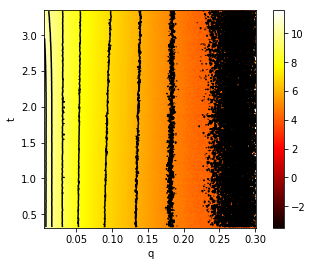

In [478]:
levels = np.arange(-10,20,1)
extent=[np.min(q),np.max(q),np.min(t),np.max(t)]
origin='upper'
aspect=0.1
plt.figure()
plt.title('title')
plt.xlabel('q')
plt.ylabel('t')
plt.imshow(np.log(data.T), cmap='hot',origin=origin,extent=extent,aspect=aspect)
plt.colorbar()
plt.contour(np.log(data.T), levels, colors='k', origin=origin,extent=extent)
plt.show()


#### 1. PCA

In [217]:
# Compute PCA
pca = PCA(n_components=3)
H = pca.fit_transform(data)  # Reconstruct signals based on orthogonal components

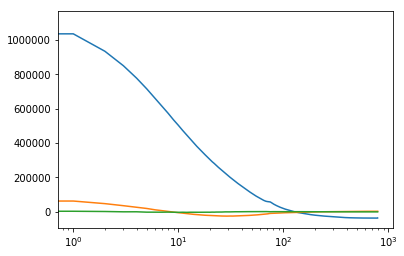

In [218]:
#H
plt.semilogx(H)
#plt.loglog(H)

#### 1. fastICA

In [356]:
# Compute ICA
ica = FastICA(n_components=3)
S_ = ica.fit_transform(data)  # Reconstruct signals
A_ = ica.mixing_  # Get estimated mixing matrix

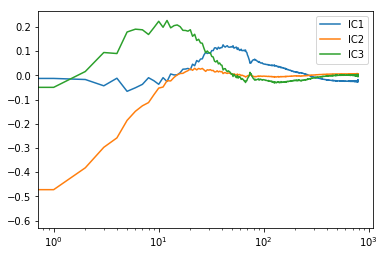

In [354]:
#S_
plt.figure()
labels = ['IC1', 'IC2', 'IC3']
for y_arr, label in zip(S_.T, labels):
    plt.semilogx(y_arr, label=label)
plt.legend()
plt.show()

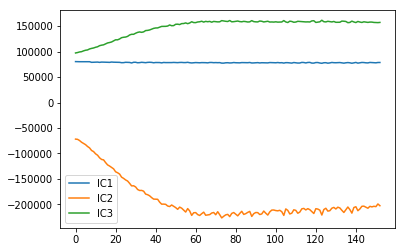

In [349]:
#A_
plt.figure()
labels = ['IC1', 'IC2', 'IC3']
for y_arr, label in zip(A_.T, labels):
    plt.plot(y_arr, label=label)
plt.legend()
plt.show()

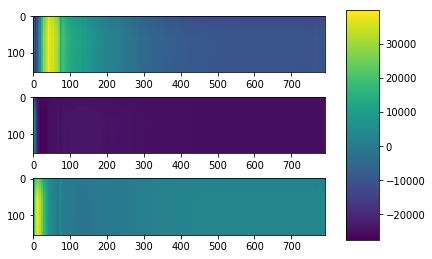

In [346]:
i=0
plt.subplot(311)
plt.imshow((np.outer(S_[:,i], A_[:,i].T)+ica.mean_).T)
plt.subplot(312)
plt.imshow((np.outer(S_[:,i+1], A_[:,i+1].T)+ica.mean_).T)
plt.subplot(313)
plt.imshow((np.outer(S_[:,i+2], A_[:,i+2].T)+ica.mean_).T)

plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
cax = plt.axes([0.85, 0.1, 0.075, 0.8])
plt.colorbar(cax=cax)
plt.show()

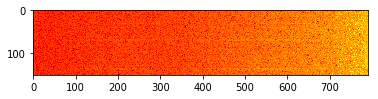

In [345]:
#plt.semilogy(abs(1-(np.dot(S_, A_.T) + ica.mean_)/data))
plt.imshow(np.log(abs(1-(np.dot(S_, A_.T) + ica.mean_)/data)).T, cmap='hot',origin='upper')
plt.show()

In [263]:
A_.shape

(153, 3)

In [237]:
S_.shape

(791, 3)

In [235]:
data.shape

(791, 153)

In [276]:
A = np.array([[1,2,3],[4,5,6],[7,8,9],[10,11,12]])
A1 = A[:,0]
S = np.array([[1,2,3],[4,5,6],[7,8,9],[10,11,12],[13,14,15]])
S1 = S[:,0]
np.outer(S1,A1.T)

array([[  1,   4,   7,  10],
       [  4,  16,  28,  40],
       [  7,  28,  49,  70],
       [ 10,  40,  70, 100],
       [ 13,  52,  91, 130]])

In [357]:
A_




array([[-79378.75931384,  95654.162717  ,  75054.86567984],
       [-79189.28642963,  96449.5926098 ,  75529.19228978],
       [-79148.72388628,  97530.68294982,  77904.88014954],
       [-79171.73094996,  97947.56195111,  81273.85592008],
       [-79337.82510515,  99462.11611349,  83658.52336089],
       [-79097.20684056, 100579.11865886,  86137.59297089],
       [-79114.23364794, 101038.67826886,  89762.78641474],
       [-79142.42463491, 102897.87831045,  92589.92868694],
       [-77947.43431809, 103739.13483512,  97694.89820047],
       [-78162.00371873, 104484.88753794,  99888.01296941],
       [-78561.42191617, 105725.9915642 , 104323.56614548],
       [-78424.53882452, 106572.86768722, 107146.93035408],
       [-77865.61884575, 108544.92012068, 112262.77305234],
       [-78415.79459724, 109419.79100419, 115540.64396379],
       [-78356.97899144, 110038.51323464, 116396.67314269],
       [-78156.80219959, 111764.41649325, 121735.59204811],
       [-78050.08608141, 113369.57592226